# Logistic Regression

<img src='Logistic Regression.png' width=500px height=400px>

Logistic regression is one of the techinques used for classification

<img src='Logistic Regression2.png' width=500px height=400px>

<img src='Logistic Regression3.png' width=500px height=400px>

<img src='Logistic Regression4.png' width=500px height=400px>

<img src='Logistic Regression5.png' width=500px height=400px>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
df = pd.read_csv('insurance_data.csv')
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


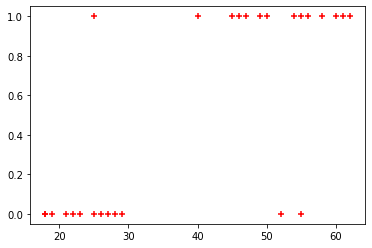

In [8]:
plt.scatter(df.age,df.bought_insurance,marker = '+',color ='red')

In [9]:
df.shape

(27, 2)

In [10]:
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,y_train,y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.9)

In [13]:
X_test

,age
13,29
24,50
14,49


In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
model = LogisticRegression()

In [18]:
model.fit(X_train,y_train)

LogisticRegression()

In [19]:
model.predict(X_test)

array([0, 1, 1], dtype=int64)

In [20]:
model.score(X_test,y_test)

1.0

In [21]:
model.predict_proba(X_test)

array([[0.78212856, 0.21787144],
       [0.21041933, 0.78958067],
       [0.23173047, 0.76826953]])

# MultiClass Classification

hand written recognition

In [23]:
from sklearn.datasets import load_digits

In [24]:
digits = load_digits()

In [25]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [27]:
len(digits.data)

1797

In [28]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 432x288 with 0 Axes>

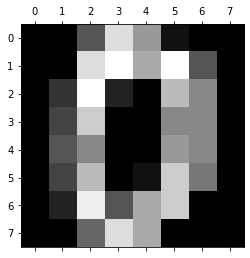

In [29]:
plt.gray()
plt.matshow(digits.images[0])

In [31]:
from sklearn.model_selection import train_test_split

In [34]:
X_train,X_test,y_train,y_test=train_test_split(digits.data,digits.target,test_size=0.2)

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
model = LogisticRegression()

In [37]:
model.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
model.score(X_test,y_test)

0.9722222222222222

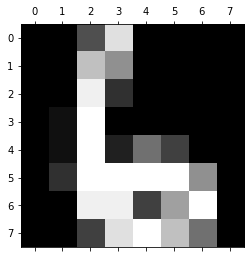

In [39]:
plt.matshow(digits.images[67])

In [40]:
digits.target[67]

6

In [41]:
model.predict([digits.data[67]])

array([6])

To get where it is not giving correct answer
Confusion metrics

In [43]:
y_predicted = model.predict(X_test)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_predicted)
cm

array([[38,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 29,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 36,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 32,  0,  1,  0,  0,  1,  0],
       [ 0,  2,  0,  0, 33,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0, 32,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 37,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  0],
       [ 0,  0,  0,  0,  1,  1,  0,  0, 38,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  2, 42]], dtype=int64)

Text(69.0, 0.5, 'Truth')

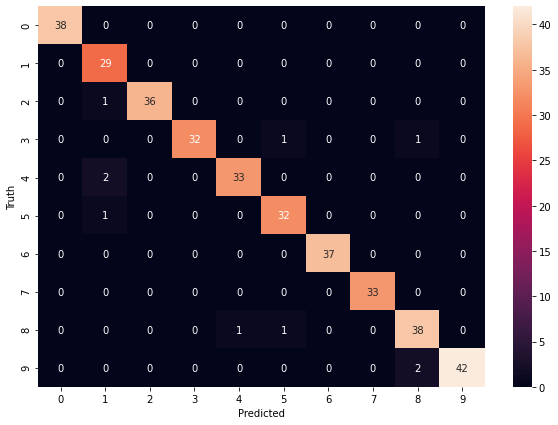

In [45]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')